### 1번
날씨 온도 예측, 종속변수 :actual(최고온도)
temp_1 : 전날 최고온도
temp_2 : 전전날 최고온도
friend : 친구의 예측온도

#### 1-1 데이터 확인 및 전처리

- 데이터 EDA 수행
- 결측치를 확인하고 처리 방안에 대해 논의하라
- 데이터 분할 방법 설명
- 최종 데이터셋이 적절함을 주장하라

In [33]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

data_path = '../data/problem1.csv'

df = pd.read_csv(data_path)

convert_week2num = {week:num for num, week in enumerate(df['week'].unique())}

df['week'] = df['week'].apply(lambda x: convert_week2num[x])
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,1,44,45,45.7,44,41,50,44,61
2,2016,1,3,2,45,44,45.8,41,43,46,47,56
3,2016,1,4,3,44,41,45.9,40,44,48,46,53
4,2016,1,5,4,41,40,46.0,44,46,46,46,41


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    int64  
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 32.8 KB


In [35]:
df.describe()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,2.994253,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,1.999992,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,0.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,1.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,3.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,5.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,6.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


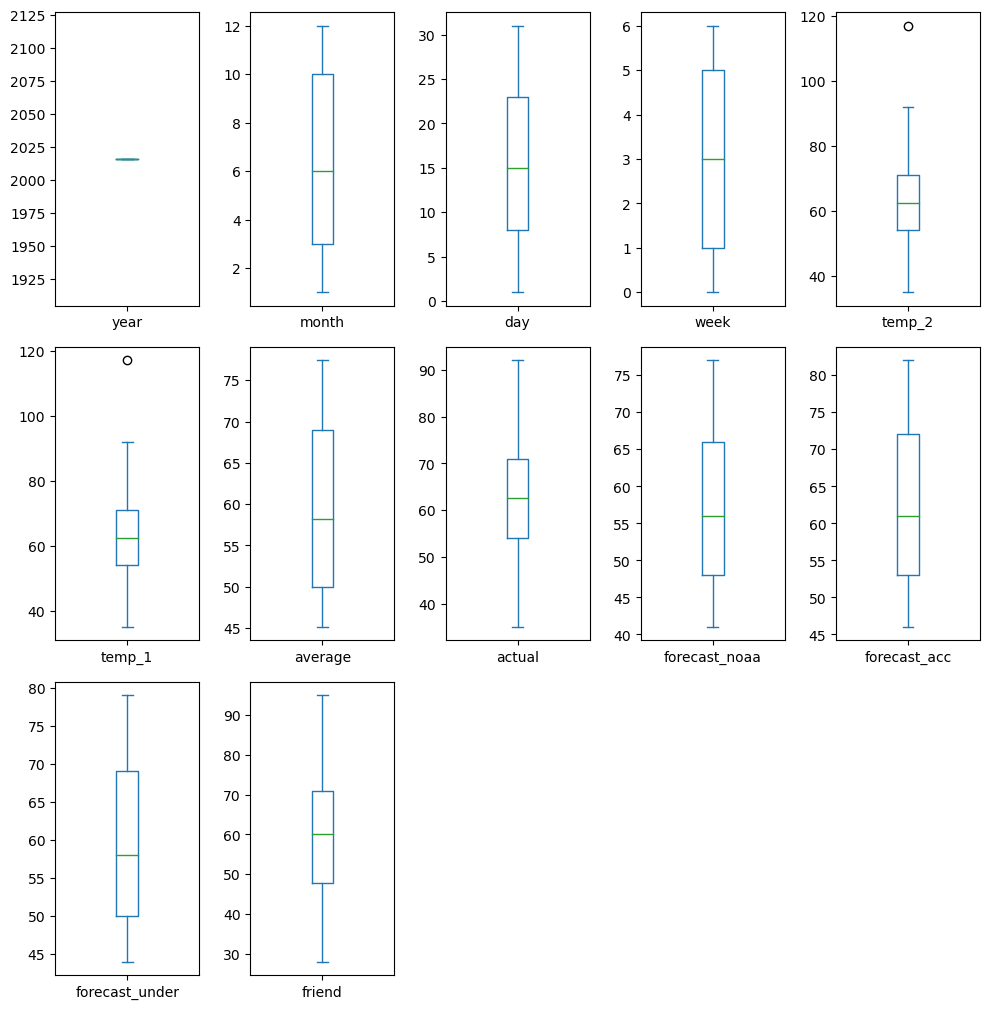

In [36]:
import matplotlib.pyplot as plt

df.plot(kind='box',subplots=True,layout = (6,5),figsize=(10,20))
plt.tight_layout()
plt.show()

In [37]:
df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str).apply(lambda x: f'{x:0>2}') + '-' + df['day'].astype(str).apply(lambda x: f'{x:0>2}')
dates = set(df['date'])
dates
print('결측치')
i = 0
for date in pd.date_range('2016-01-01', '2016-12-31', freq='d').strftime('%Y-%m-%d').tolist():
    if date not in dates:
        print(date)
        i+=1
print('결측치 갯수 :', i)

결측치
2016-02-13
2016-02-14
2016-02-29
2016-08-17
2016-08-18
2016-08-19
2016-08-20
2016-08-21
2016-08-22
2016-08-24
2016-08-25
2016-08-26
2016-08-27
2016-08-29
2016-08-31
2016-09-01
2016-09-02
2016-10-30
결측치 갯수 : 18


시계열성을 갖기 위해서는 여러 연도의 데이터가 필요하지만 1년 데이터만 존재하므로 시간과 관련된 데이터는 제거하는 것이 더 효과적

또한, temp_1, temp_2에서 시계열적인 의미를 담고 있으므로 시간 데이터가 temp에 들어있음

In [38]:
df.corr()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.001629,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,0.012323,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
week,NaN,0.001629,0.012323,1.000000,0.005840,0.008726,0.002357,0.011495,-0.016239,0.003517,0.008553,-0.002576
temp_2,NaN,0.047651,-0.046194,0.005840,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.008726,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.002357,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.011495,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,-0.016239,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.003517,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054


In [54]:
from sklearn.model_selection import train_test_split

features = ['average', 'temp_1', 'temp_2', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend']

features = df[features]
target = df['actual']

train_x, test_x, train_y, test_y = train_test_split(features, target, train_size=0.7 ,random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((243, 7), (105, 7), (243,), (105,))

#### 1-2 Random Forest 모델 적합 및 검증

- Random Forest 학습 및 예측 결과 해석
- 예측 결과 검정 해석, 중요변수 도출
- 변수 중요성 분석 및 그래프 출력

학습 속도 : 0.1064450740814209
인퍼런스 속도 : 0.005882978439331055
MSE : 23.387314285714282


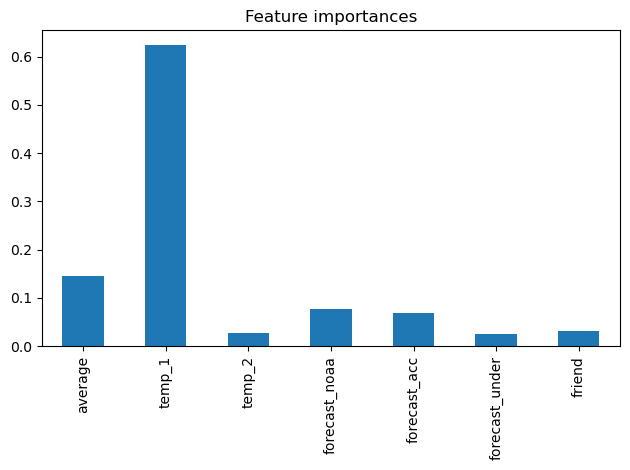

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

clf = RandomForestRegressor(random_state=42)
start = time.time()
clf.fit(train_x, train_y)
end = time.time()

print('학습 속도 :', end - start)

start = time.time()
pred = clf.predict(test_x)
end = time.time()

print('인퍼런스 속도 :', end-start)
print('MSE :', mean_squared_error(test_y, pred))

importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=train_x.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

#### 1-3 SVM(Support Vector Machine) 모델 적합 및 검증

- svm 학습 및 예측 결과 해석
- 예측 결과 검정 해석, 중요변수 도출
- 변수 중요성 분석 및 그래프 출력

In [59]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import time
svm = SVR()

start = time.time()
svm.fit(train_x, train_y)
end = time.time()

print('학습속도 :', end - start)

start = time.time()
pred = svm.predict(test_x)
end = time.time()
print('인퍼런스 속도 :', end-start)
print('MSE : ',mean_squared_error(test_y, pred))
print('svm은 변수 중요도를 따로 추출 할 수 없다. MSE의 경우 RandomForest에 비해 낮다')

학습속도 : 0.008723974227905273
인퍼런스 속도 : 0.005590200424194336
MSE :  38.437855069397
svm은 변수 중요도를 따로 추출 할 수 없다. MSE의 경우 RandomForest에 비해 낮다


#### 1-4 모델 비교 및 향후 개선 방향 도출¶

- Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택
- 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?
- 모델링 관련 추후 개선 방향 제시

1. 두 모델 중 MSE가 더 낮은 모델은 Random Forest이므로 해당 모델 선택
2. Random Forest는 다수의 의사 결정 트리를 이용한 앙상블 모델로 예측력이 좋다고 알려짐. 이러한 트리 기반의 모델은 시계열 데이터에서도 좋은 성능을 보임. 운영 관점에서는 학습 및 인퍼런스 속도가 SVM이 우월하므로 SVM을 고려해볼 수 있지만, 정확도가 더 중요한지 아니면 속도가 중요한지는 어떤 목표를 가지고 운영하는지에 따라 달림
3. 주기성을 띄는 데이터이므로 결측치 데이터를 보완한다면 더 좋은 성능을 보임. 또한, 좀더 robust한 모델로 알려진 XGBoost 모델을 이용한다면 더 좋은 성능을 보일 것임